# **a. Data Load and Data Preparation**

1. Load the dataset and parse the date column:

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from google.colab import files
from sklearn.metrics import mean_absolute_error

In [ ]:
# Upload the dataset
uploaded = files.upload()

Saving Balaji Fast Food Sales.csv to Balaji Fast Food Sales.csv


In [ ]:
# Load the dataset into a pandas DataFrame
import io
df = pd.read_csv(io.BytesIO(uploaded['Balaji Fast Food Sales.csv']))

In [ ]:
from datetime import datetime

def standardize_date(date_str):
    if not isinstance(date_str, str):
        date_str = str(date_str)
    for fmt in ('%d/%m/%Y', '%d-%m-%Y', '%Y-%m-%d', '%Y/%m/%d'):
        try:
            return datetime.strptime(date_str, fmt).strftime('%Y-%m-%d')
        except ValueError:
            continue
    print(f"Date format error for: {date_str}")
    raise ValueError(f'No valid date format found for {date_str}')


In [ ]:
import pandas as pd

df['date'] = df['date'].astype(str)

def apply_standardize_date(date_series):
    standardized_dates = []
    for date in date_series:
        try:
            standardized_dates.append(standardize_date(date))
        except ValueError as e:
            print(e)
            standardized_dates.append(None)
    return standardized_dates

df['date'] = apply_standardize_date(df['date'])


df = df.dropna(subset=['date'])

df.tail()


,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,gender,time_of_sale
983,984,2023-07-01,Frankie,Fastfood,50,3,150,Cash,Male,Afternoon
986,987,2023-04-01,Vadapav,Fastfood,20,3,60,Cash,Female,Evening
987,988,2023-03-01,Frankie,Fastfood,50,13,650,NaN,Female,Night
988,989,2022-11-10,Cold coffee,Beverages,40,13,520,Cash,Male,Afternoon
993,994,2022-01-11,Panipuri,Fastfood,20,2,40,Online,Female,Evening


In [ ]:
na_dates = df['date'].isna().sum()
print(f"Number of NaT (Not a Time) values: {na_dates}")

Number of NaT (Not a Time) values: 0


In [ ]:
print("\nData after standardizing the date format:")
print(df.head())


Data after standardizing the date format:
   order_id        date        item_name  item_type  item_price  quantity  \
0         1  2022-03-07         Aalopuri   Fastfood          20        13   
3         4  2023-03-02  Sugarcane juice  Beverages          25         6   
4         5  2022-02-10  Sugarcane juice  Beverages          25         8   
6         7  2022-03-05  Sugarcane juice  Beverages          25         9   
8         9  2022-10-06         Panipuri   Fastfood          20         1   

   transaction_amount transaction_type  gender time_of_sale  
0                 260              NaN    Male        Night  
3                 150           Online    Male        Night  
4                 200           Online    Male      Evening  
6                 225             Cash    Male      Evening  
8                  20             Cash  Female      Morning  


2. Create extra columns (day, season, is_weekend):

In [ ]:
# Create 'day' column
df['date'] = pd.to_datetime(df['date'])
df['day'] = df['date'].dt.day_name()

# Function to determine the season
def get_season(date):
    month = date.month
    if month in [9,10,11,12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['season'] = pd.to_datetime(df['date'], format='%d/%m/%Y').apply(get_season)

# Create 'is_weekend' column
df['is_weekend'] = df['day'].apply(lambda x: x in ['Saturday', 'Sunday'])


In [ ]:
print("\nData after feature engineering:")
print(df.tail())


Data after feature engineering:
     order_id       date    item_name  item_type  item_price  quantity  \
983       984 2023-07-01      Frankie   Fastfood          50         3   
986       987 2023-04-01      Vadapav   Fastfood          20         3   
987       988 2023-03-01      Frankie   Fastfood          50        13   
988       989 2022-11-10  Cold coffee  Beverages          40        13   
993       994 2022-01-11     Panipuri   Fastfood          20         2   

     transaction_amount transaction_type  gender time_of_sale        day  \
983                 150             Cash    Male    Afternoon   Saturday   
986                  60             Cash  Female      Evening   Saturday   
987                 650              NaN  Female        Night  Wednesday   
988                 520             Cash    Male    Afternoon   Thursday   
993                  40           Online  Female      Evening    Tuesday   

     season  is_weekend  
983  Summer        True  
986  Spring  

# **b. Data Preprocessing**

1. Data Cleaning:

In [ ]:
# Handle missing values
df = df.dropna(subset=['date', 'item_name', 'item_type', 'quantity', 'gender', 'time_of_sale'])


# **c. Data Visualization**

1. Visualize the number of orders per day of the week:

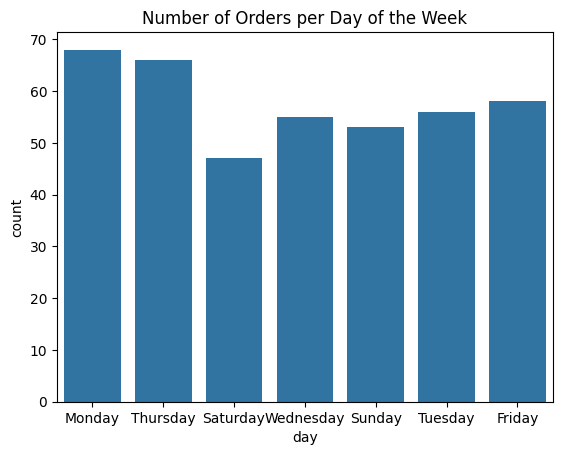

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='day', data=df)
plt.title('Number of Orders per Day of the Week')
plt.show()


2. Visualize orders by time of sale:


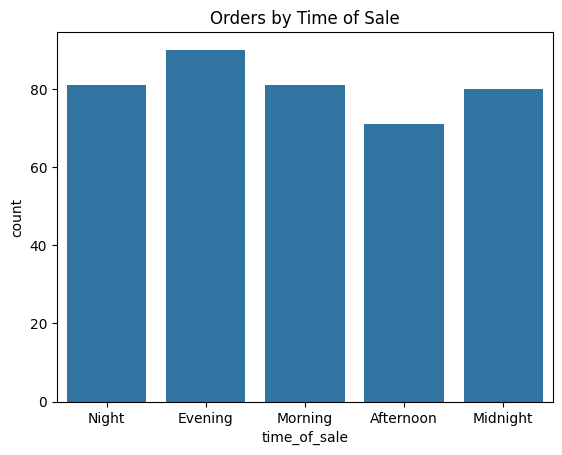

In [ ]:
sns.countplot(x='time_of_sale', data=df)
plt.title('Orders by Time of Sale')
plt.show()

3. Visualize orders by gender:

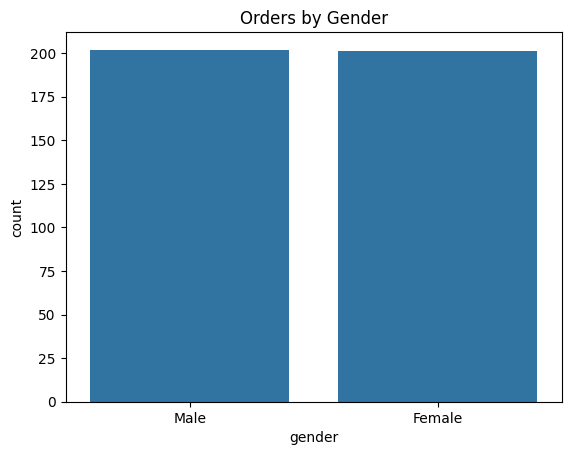

In [ ]:
sns.countplot(x='gender', data=df)
plt.title('Orders by Gender')
plt.show()

4. Visualize the distribution of item types:

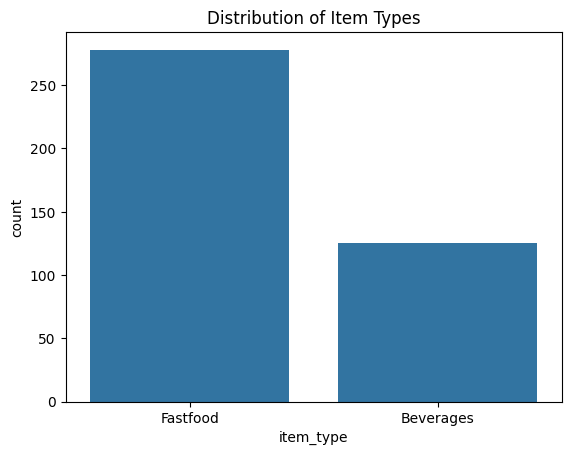

In [ ]:
sns.countplot(x='item_type', data=df)
plt.title('Distribution of Item Types')
plt.show()

5. Year-wise sales visualization:

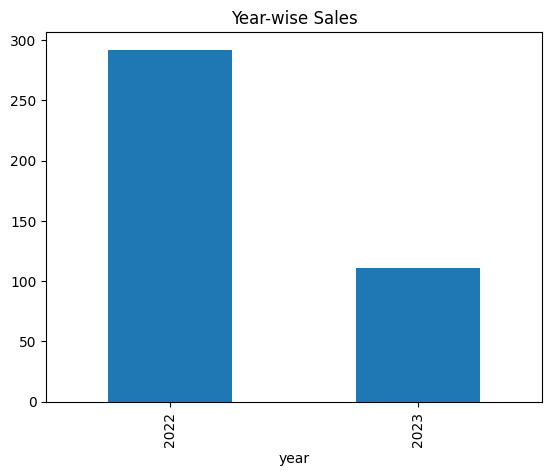

In [ ]:
df['year'] = pd.to_datetime(df['date'], format='%d/%m/%Y').dt.year
df.groupby('year').size().plot(kind='bar')
plt.title('Year-wise Sales')
plt.show()

# **d. Customer Segmentation using K-Means Clustering**

1. K-Means Clustering:

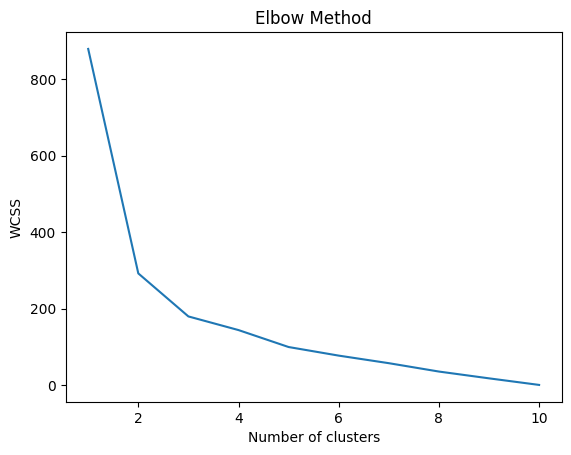


 Total number of clusters: 4


,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,gender,time_of_sale,day,season,is_weekend,year,Cluster
983,984,2023-07-01,Frankie,Fastfood,50,3,150,Cash,Male,Afternoon,Saturday,Summer,True,2023,2
986,987,2023-04-01,Vadapav,Fastfood,20,3,60,Cash,Female,Evening,Saturday,Spring,True,2023,0
987,988,2023-03-01,Frankie,Fastfood,50,13,650,NaN,Female,Night,Wednesday,Spring,False,2023,1
988,989,2022-11-10,Cold coffee,Beverages,40,13,520,Cash,Male,Afternoon,Thursday,Winter,False,2022,2
993,994,2022-01-11,Panipuri,Fastfood,20,2,40,Online,Female,Evening,Tuesday,Winter,False,2022,0


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables
df_encoded = df.copy()
label_encoders = {}
for column in ['time_of_sale','item_type', 'item_name', 'day', 'gender']:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le

# Selecting relevant features
X = df_encoded[['time_of_sale', 'gender']]

# Determine optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fit K-Means with optimal number of clusters
optimal_clusters = 4  # Replace with the determined number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(X)

# Print total number of clusters
print(f"\n Total number of clusters: {optimal_clusters}")

df.tail()

# **e. Prediction using Linear Regression**

1. Choose needed feature columns and target column:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# Feature columns and target
features = ['time_of_sale', 'item_type', 'item_name', 'day']
target = 'quantity'

# Encoding categorical variables for the regression model
df_encoded = pd.get_dummies(df[features], drop_first=True)
X = df_encoded
y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

2. Test the model and evaluate accuracy:

In [ ]:
# Predicting the test set results
y_pred = model.predict(X_test)

# Confusion Matrix (can be adapted for regression purposes)
y_pred_class = np.where(y_pred > 0.5, 1, 0)
y_test_class = np.where(y_test > 0.5, 1, 0)

cm = confusion_matrix(y_test_class, y_pred_class)
accuracy = accuracy_score(y_test_class, y_pred_class)
# secondtypeaccuracy=mean_absolute_error(y_test,y_pred)
print(f'Confusion Matrix:\n{cm}')
print(f'Accuracy: {accuracy * 100:.2f}%')
# print(f'Mean Absolute Error: {secondtypeaccuracy}')

Confusion Matrix:
[[81]]
Accuracy: 100.00%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [ ]:
import statsmodels.api as sm
def linear_regression(x,y):
  X=sm.add_constant(x)
  multiple_model=sm.OLS(y,x).fit()
  print(multiple_model.summary())
linear_regression(X,y)

                            OLS Regression Results                            
Dep. Variable:               quantity   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.9249
Date:                Tue, 01 Oct 2024   Prob (F-statistic):              0.541
Time:                        09:01:24   Log-Likelihood:                -1163.8
No. Observations:                 403   AIC:                             2362.
Df Residuals:                     386   BIC:                             2430.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
time_of_sale_Evening  

# **f. Prediction Output and Visualization**

1. Take day and date input from the user:

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

In [ ]:
current_date_input = input("Enter the current date (format: DD/MM/YYYY): ")
current_day_input = input("Enter the current day (e.g., Monday): ")


input_date = pd.to_datetime(current_date_input, format='%d/%m/%Y')
input_day = current_day_input



Enter the current date (format: DD/MM/YYYY): 5/10/2024
Enter the current day (e.g., Monday): Sunday


In [ ]:
import pandas as pd
import numpy as np

# Example inputs
# input_date = '20/08/2024'
# input_day = 'Sunday'

# Define item types and item names
item_types = ['Fastfood', 'Beverages']
item_names_fastfood = ['Aalopuri', 'Frankie', 'Panipuri', 'Sandwich', 'Vadapav']
item_names_beverages = ['Cold coffee', 'Sugarcane juice']

# Generate all combinations of time_of_sale and item_type
times_of_sale = ['Morning', 'Afternoon', 'Evening', 'Night', 'Midnight']
item_names = item_names_fastfood + item_names_beverages

# Create a DataFrame with all combinations
df_input = pd.DataFrame(
    [(time, item_type, item_name)
     for time in times_of_sale
     for item_type in item_types
     for item_name in item_names if (item_type == 'Beverages' and item_name in item_names_beverages) or (item_type == 'Fastfood' and item_name in item_names_fastfood)],
    columns=['time_of_sale', 'item_type', 'item_name']
)

# Add other columns
df_input['day'] = input_day
df_input['season'] = get_season(pd.to_datetime(input_date, format='%d/%m/%Y'))
df_input['is_weekend'] = input_day in ['Saturday', 'Sunday']

# Encode the input data
df_input_encoded = pd.get_dummies(df_input, drop_first=True)

# Ensure all columns present in the training data are in the test data
missing_cols = set(X.columns) - set(df_input_encoded.columns)
for col in missing_cols:
    df_input_encoded[col] = 0

# Reorder columns to match the training set
df_input_encoded = df_input_encoded[X.columns]

# Scale the input data
df_input_scaled = scaler.transform(df_input_encoded)

# Make predictions
predictions = model.predict(df_input_scaled)
df_input['predicted_quantity'] = predictions

# Display separate tables based on time_of_sale
for time in times_of_sale:
    print(f"Table for {time}:")
    table = df_input[df_input['time_of_sale'] == time][['item_type', 'item_name', 'predicted_quantity']]
    print(table)
    print("\n")


Table for Morning:
   item_type        item_name  predicted_quantity
0   Fastfood         Aalopuri            8.679278
1   Fastfood          Frankie            7.982390
2   Fastfood         Panipuri            7.271881
3   Fastfood         Sandwich            8.540417
4   Fastfood          Vadapav            8.671407
5  Beverages      Cold coffee            8.935912
6  Beverages  Sugarcane juice            7.633634


Table for Afternoon:
    item_type        item_name  predicted_quantity
7    Fastfood         Aalopuri            8.317575
8    Fastfood          Frankie            7.620688
9    Fastfood         Panipuri            6.910179
10   Fastfood         Sandwich            8.178715
11   Fastfood          Vadapav            8.309704
12  Beverages      Cold coffee            8.574210
13  Beverages  Sugarcane juice            7.271932


Table for Evening:
    item_type        item_name  predicted_quantity
14   Fastfood         Aalopuri            8.872290
15   Fastfood          Fran

2. Visualize the predictions:

<ipython-input-24-6dbeb9a43a8a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=time_data, x='item_name', y='predicted_quantity', palette='viridis')


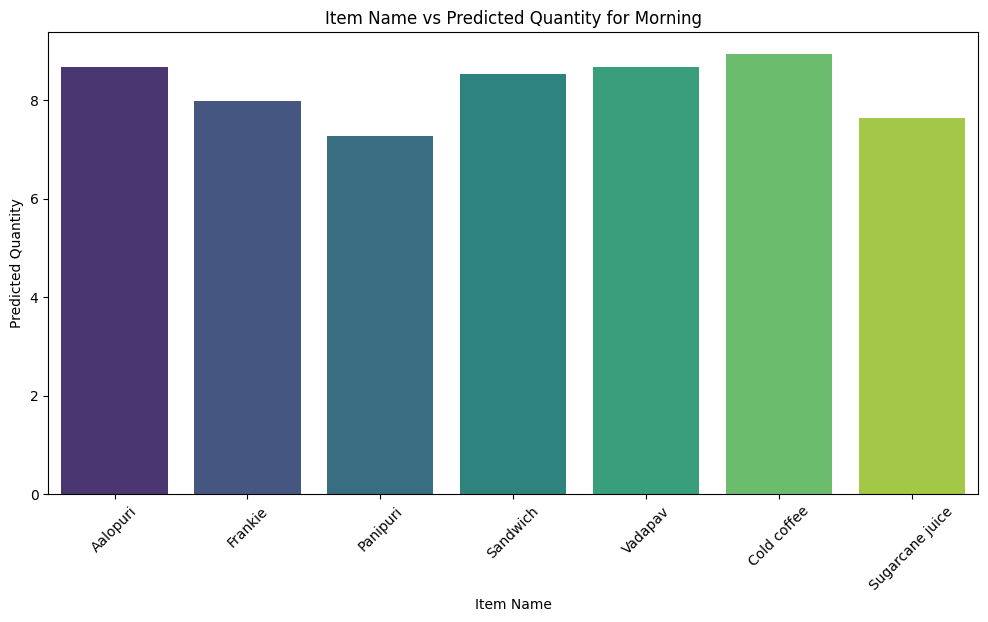

<ipython-input-24-6dbeb9a43a8a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=time_data, x='item_name', y='predicted_quantity', palette='viridis')


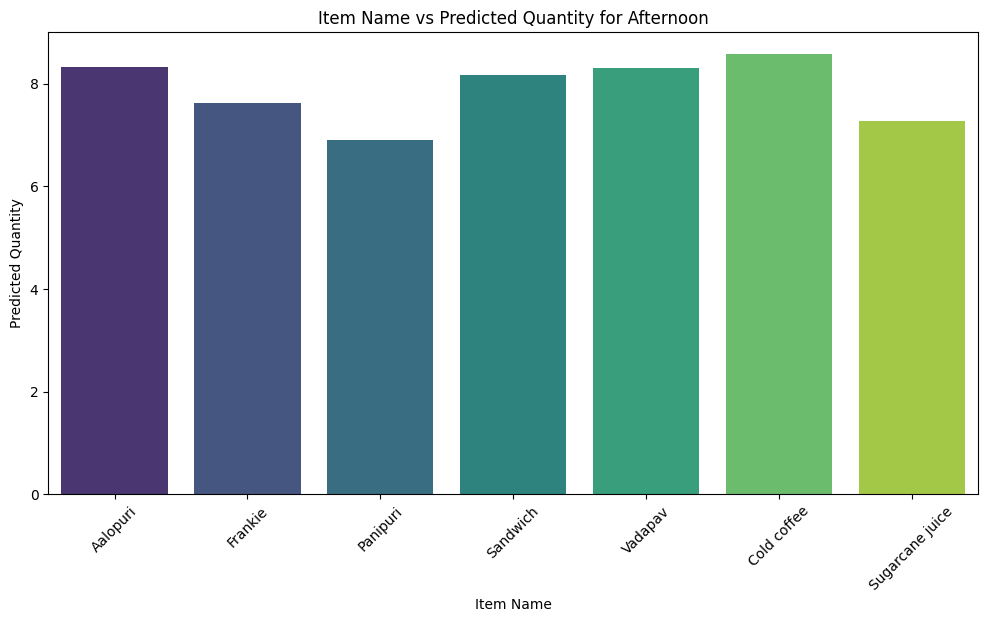

<ipython-input-24-6dbeb9a43a8a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=time_data, x='item_name', y='predicted_quantity', palette='viridis')


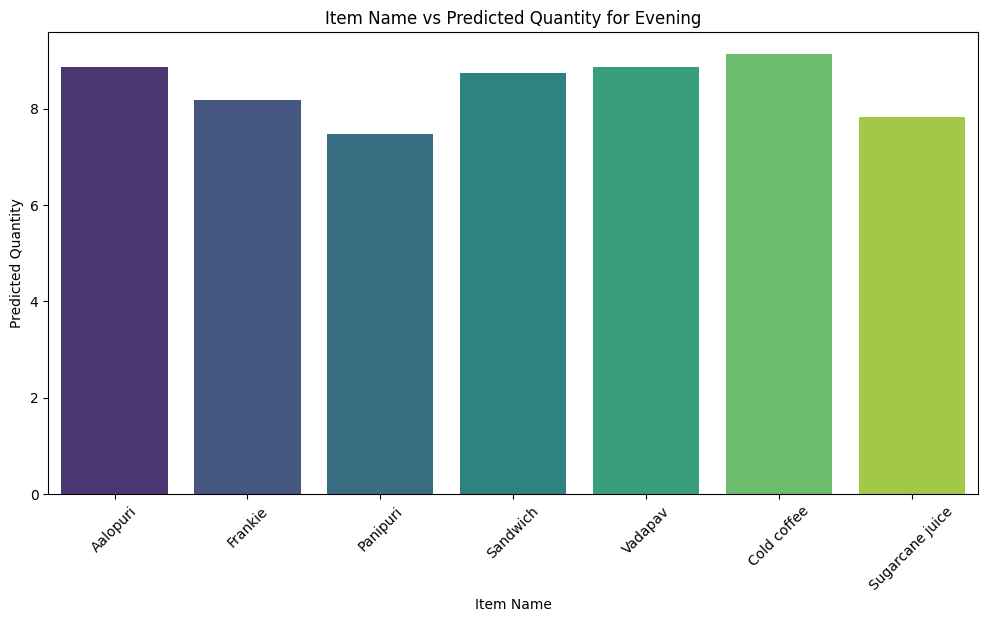

<ipython-input-24-6dbeb9a43a8a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=time_data, x='item_name', y='predicted_quantity', palette='viridis')


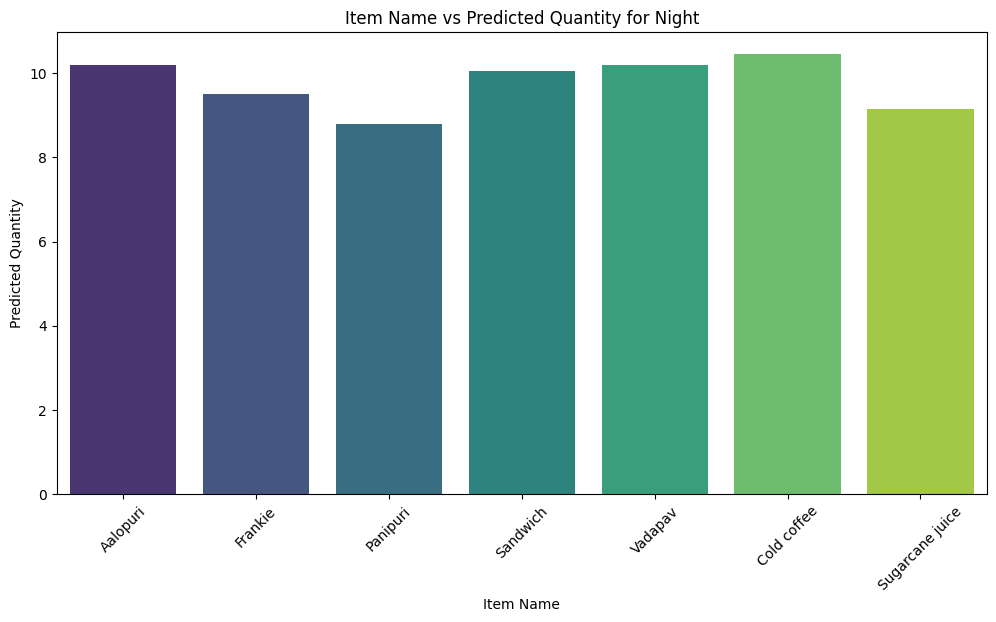

<ipython-input-24-6dbeb9a43a8a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=time_data, x='item_name', y='predicted_quantity', palette='viridis')


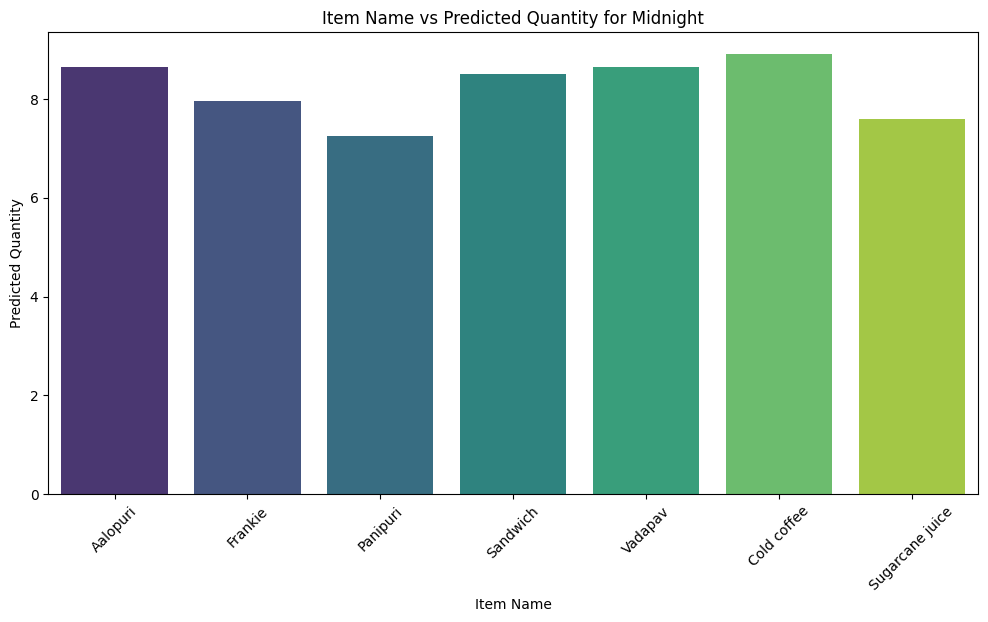

In [ ]:
# List of times of sale
times_of_sale_list = ['Morning', 'Afternoon', 'Evening', 'Night', 'Midnight']

for time_of_sale in times_of_sale_list:
    # Filter data for the current time_of_sale
    time_data = df_input[df_input['time_of_sale'] == time_of_sale]

    # Create the plot for item_name vs predicted_quantity
    plt.figure(figsize=(12, 6))
    sns.barplot(data=time_data, x='item_name', y='predicted_quantity', palette='viridis')
    plt.title(f'Item Name vs Predicted Quantity for {time_of_sale}')
    plt.xlabel('Item Name')
    plt.ylabel('Predicted Quantity')
    plt.xticks(rotation=45)
    plt.show()

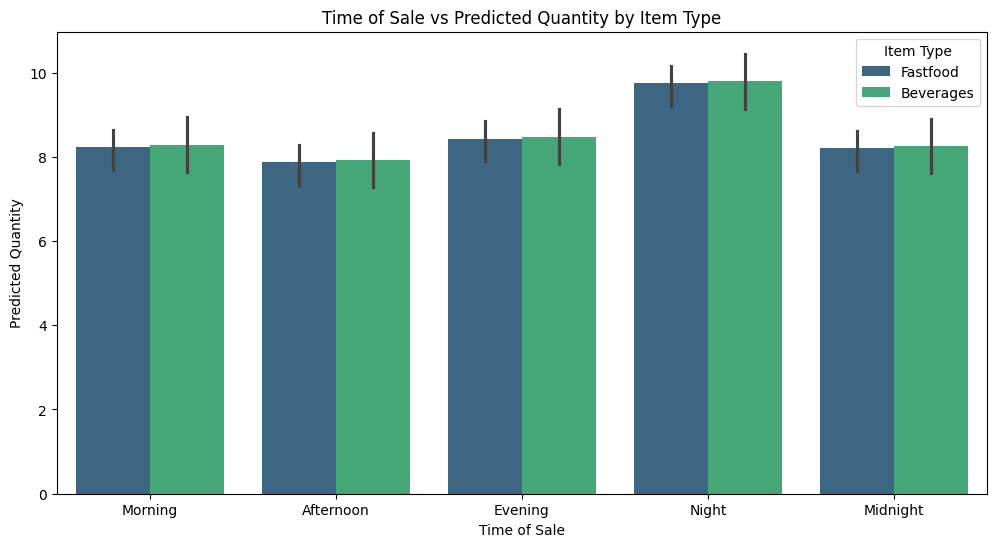

In [ ]:
# Plot: Time of Sale vs Item Type (based on predicted quantity)
plt.figure(figsize=(12, 6))
sns.barplot(data=df_input, x='time_of_sale', y='predicted_quantity', hue='item_type', palette='viridis')
plt.title('Time of Sale vs Predicted Quantity by Item Type')
plt.xlabel('Time of Sale')
plt.ylabel('Predicted Quantity')
plt.legend(title='Item Type')
plt.show()


# ***Check Accuracy of Model***

1. Test the model and evaluate accuracy:

In [ ]:
# Predicting the test set results
y_pred = model.predict(X_test)

# Confusion Matrix (can be adapted for regression purposes)
y_pred_class = np.where(y_pred > 0.5, 1, 0)
y_test_class = np.where(y_test > 0.5, 1, 0)

cm = confusion_matrix(y_test_class, y_pred_class)
accuracy = accuracy_score(y_test_class, y_pred_class)

print(f'Confusion Matrix:\n{cm}')
print(f'Accuracy: {accuracy * 100:.2f}%')


Confusion Matrix:
[[81]]
Accuracy: 100.00%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [ ]:
import statsmodels.api as sm
def linear_regression(x,y):
  X=sm.add_constant(x)
  multiple_model=sm.OLS(y,x).fit()
  print(multiple_model.summary())
linear_regression(X,y)

                                 OLS Regression Results                                
Dep. Variable:               quantity   R-squared (uncentered):                   0.680
Model:                            OLS   Adj. R-squared (uncentered):              0.677
Method:                 Least Squares   F-statistic:                              212.1
Date:                Thu, 29 Aug 2024   Prob (F-statistic):                    2.34e-97
Time:                        20:13:25   Log-Likelihood:                         -1238.5
No. Observations:                 403   AIC:                                      2485.
Df Residuals:                     399   BIC:                                      2501.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [ ]:
from sklearn.preprocessing import LabelEncoder

le_item_name=LabelEncoder()
le_item_type = LabelEncoder()
le_time_of_sale = LabelEncoder()
le_day = LabelEncoder()
le_transaction=LabelEncoder()
le_gender=LabelEncoder()
le_season=LabelEncoder()
le_weekend=LabelEncoder()

df['item_name'] = le_item_name.fit_transform(df['item_name'])
df['item_type'] = le_item_type.fit_transform(df['item_type'])
df['time_of_sale'] = le_time_of_sale.fit_transform(df['time_of_sale'])
df['day'] = le_day.fit_transform(df['day'])
df['transaction_type'] = le_transaction.fit_transform(df['transaction_type'])
df['gender'] = le_gender.fit_transform(df['gender'])
df['season'] = le_season.fit_transform(df['season'])
df['is_weekend'] = le_weekend.fit_transform(df['is_weekend'])


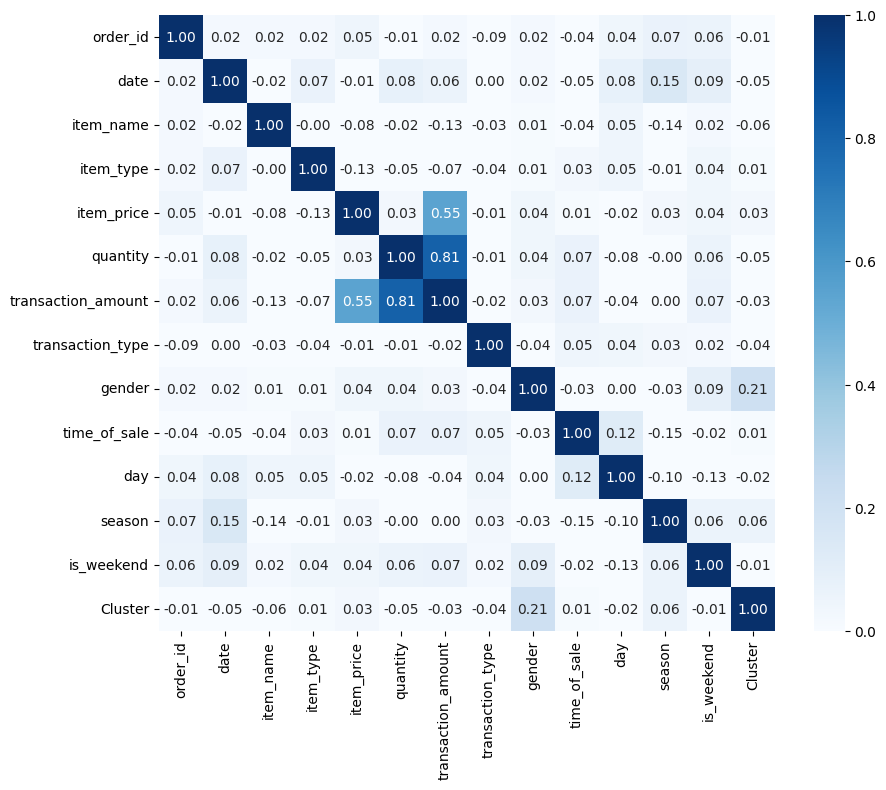

In [ ]:
# correlational matrix
my_matrix=df.corr(method="spearman").round(2)
plt.figure(figsize=(10,8))
sns.heatmap(my_matrix,cmap="Blues",vmin=0,vmax=1,annot=True,fmt="0.2f",square=True)
plt.show()

In [ ]:
from sklearn.metrics import r2_score
y_test_mean=np.full(len(y_test),y_test.mean())

In [ ]:
y_test_mean

array([7.90123457, 7.90123457, 7.90123457, 7.90123457, 7.90123457,
       7.90123457, 7.90123457, 7.90123457, 7.90123457, 7.90123457,
       7.90123457, 7.90123457, 7.90123457, 7.90123457, 7.90123457,
       7.90123457, 7.90123457, 7.90123457, 7.90123457, 7.90123457,
       7.90123457, 7.90123457, 7.90123457, 7.90123457, 7.90123457,
       7.90123457, 7.90123457, 7.90123457, 7.90123457, 7.90123457,
       7.90123457, 7.90123457, 7.90123457, 7.90123457, 7.90123457,
       7.90123457, 7.90123457, 7.90123457, 7.90123457, 7.90123457,
       7.90123457, 7.90123457, 7.90123457, 7.90123457, 7.90123457,
       7.90123457, 7.90123457, 7.90123457, 7.90123457, 7.90123457,
       7.90123457, 7.90123457, 7.90123457, 7.90123457, 7.90123457,
       7.90123457, 7.90123457, 7.90123457, 7.90123457, 7.90123457,
       7.90123457, 7.90123457, 7.90123457, 7.90123457, 7.90123457,
       7.90123457, 7.90123457, 7.90123457, 7.90123457, 7.90123457,
       7.90123457, 7.90123457, 7.90123457, 7.90123457, 7.90123